# Lab 5
## 11849060 谭树杰

## Lab 5-1 Image input and output

In [144]:
!ls

'Lab 5 – Application to Image Segmentation.ipynb'   MRI2.jpg
 Lena.png					    avg_Lena.png
 LenaGrey.png					    g_Lena.png
 MRI1.jpg					    median_Lena.png


In [77]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn import mixture


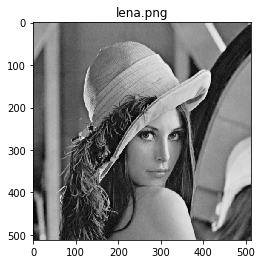

In [4]:
### Read Lena images 
path_in = "./Lena.png"
img = cv2.imread(path_in, 0)
plt.title("lena.png")
plt.imshow(img, cmap='gray')

After reading in image, use averaging filer, Gaussian filter, 3x3 median
filter to process the image matrices (note: you need write your own
algorithms for these filters. Finally, the original Lena image is a color
image, if you want, you can process the color image)

In [5]:
def arithmetic_mean_filter(src, size=3):
    margin = int(size / 2)
    dst = np.zeros_like(src, dtype=float)
    img_padded = np.pad(src, ((margin, margin), (margin, margin)), 'constant')
    for r in range(margin, img_padded.shape[0] - margin):
        for c in range(margin, img_padded.shape[1] - margin):
            filter_window = np.copy(img_padded[r - margin:r + margin + 1, c - margin:c + margin + 1])
            dst[r - margin, c - margin] = np.sum(filter_window) / (size * size)
    return dst

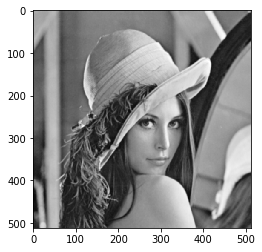

In [6]:
avg_img = arithmetic_mean_filter(img)
plt.imshow(avg_img, cmap='gray')

Save the matrices to image files to verify the images

In [15]:
plt.imsave("avg_Lena.png", avg_img,cmap="gray")

In [8]:
def gaussin_template(mu, sigma, size):
    assert size % 2 != 0
    margin = size // 2
    x = y = list(range(-margin,margin+1))
    xv, yv = np.meshgrid(x,y)
    template = np.exp(-(xv**2+yv**2)/(2*sigma**2))
    template = template / np.sum(template)
    return template
def myfilter2D(src, kernel):
    if kernel.shape[0] != kernel.shape[1]:
        raise Exception("kernel.shape[0] != kernel.shape[1]")
    margin = int(kernel.shape[0] / 2)
    dst = np.zeros_like(src, dtype=float)
    img_padded = np.pad(src, ((margin, margin), (margin, margin)), 'constant')
    for r in range(margin, img_padded.shape[0] - margin):
        for c in range(margin, img_padded.shape[1] - margin):
            filter_window = np.copy(img_padded[r - margin:r + margin + 1, c - margin:c + margin + 1])
            dst[r - margin, c - margin] = np.vdot(filter_window, kernel)
    cv2.normalize(dst, dst, 0, 1, cv2.NORM_MINMAX)
    return dst

In [9]:
mu = 0
sigma = 1
size = 5
template = gaussin_template(mu, sigma, size)
template.shape
# template

(5, 5)

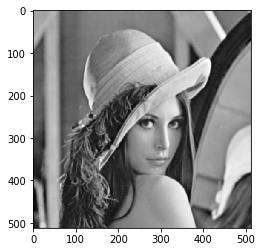

In [10]:
g_img = myfilter2D(img, template)
plt.imshow(g_img, cmap="gray")

In [14]:
plt.imsave("g_Lena.png", g_img,cmap="gray")

In [11]:
# median_filter(img, size=3):
def median_filter(src, size=3):
    margin = int(size / 2)
    dst = np.zeros_like(src, dtype=float)
    img_padded = np.pad(src, ((margin, margin), (margin, margin)), 'constant')
    for r in range(margin, img_padded.shape[0] - margin):
        for c in range(margin, img_padded.shape[1] - margin):
            filter_window = np.copy(img_padded[r - margin:r + margin + 1, c - margin:c + margin + 1])
            dst[r - margin, c - margin] = np.median(filter_window)
    return dst

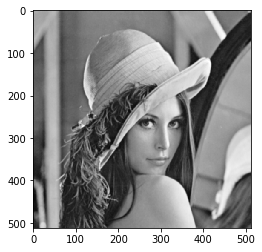

In [12]:
med_img = arithmetic_mean_filter(img)
plt.imshow(med_img, cmap='gray')

In [16]:
plt.imsave("median_Lena.png", med_img,cmap="gray")

### Lab 5-2 Probability density functions

Consider image pixel value function as a random variable, generate its
probability density function – actually it is the normalized histogram,
draw this probability function


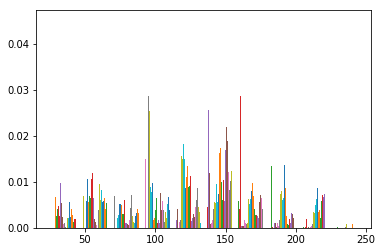

In [27]:
n, bins, patches = plt.hist(img, density=True)

In [28]:
bins

array([ 24. ,  46.1,  68.2,  90.3, 112.4, 134.5, 156.6, 178.7, 200.8,
       222.9, 245. ])

Use this function to classify the image pixels into one binary image, 2-
bit image, 3-bit image, 4-bit image. That is, classifying image pixels
into different classes

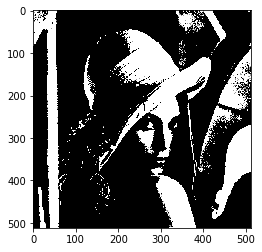

In [29]:
# 2- bit image
seg_2 = np.copy(img)
seg_2[seg_2<155] = 0
seg_2[seg_2>155] = 255
plt.imshow(seg_2,cmap="gray")

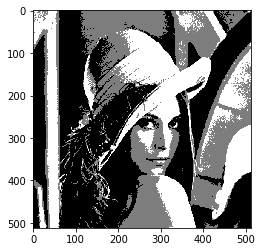

In [50]:
# 3-bit image
seg_3 = np.copy(img)
seg_3[seg_3<120] = 0
seg_3[np.multiply(seg_3>=120, seg_3 < 155)] = 125
seg_3[seg_3>155] = 255
plt.imshow(seg_3,cmap="gray")

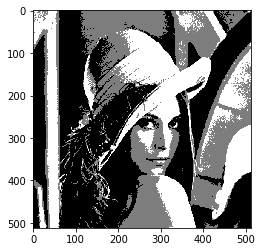

In [52]:
# 4-bit image
seg_4 = np.copy(img)
seg_4[seg_4<60] = 0
seg_4[np.multiply(seg_4 >= 60, seg_4<120)] = 0
seg_4[np.multiply(seg_4>=120, seg_4 < 155)] = 125
seg_4[seg_4>155] = 255
plt.imshow(seg_4,cmap="gray")

### Lab 5-3 Application of Gaussian Models

Segmentation of MRI images using mixed Gaussian models for
provided data sets – you need to determine the number of Gaussian
models, mean, and variance for each Gaussian model, also use color
for different categories.

(2048, 1749)

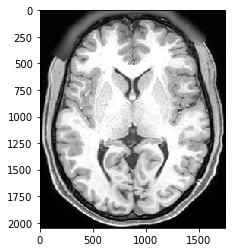

In [78]:
MRI1 = cv2.imread("MRI1.jpg",0)
plt.imshow(MRI1, cmap="gray")
MRI1.shape

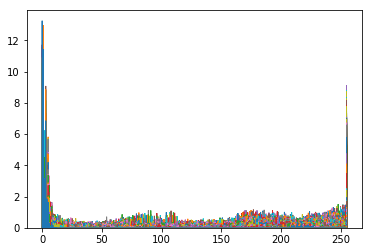

In [79]:
n, bins, _ = plt.hist(MRI1, density=True,bins=10000,histtype='step')

In [80]:
# segment MRI1 to 4 classes by GMM
np.random.seed(1)
g = mixture.GaussianMixture(n_components=4)
# Generate random observations with two modes centered on 0
# and 10 to use for training.
obs = MRI1.ravel()
obs = obs[:,np.newaxis]
g.fit(obs) 
np.round(g.weights_, 2)


array([0.17, 0.21, 0.26, 0.36])

In [83]:
print(np.round(g.means_, 2))
print(np.round(g.covariances_, 2))

[[  2.42]
 [245.59]
 [ 79.39]
 [186.31]]
[[[   5.89]]

 [[  92.47]]

 [[2043.2 ]]

 [[ 629.19]]]


In [86]:
np.sort(np.squeeze(g.means_))

array([  2.4171899 ,  79.39234316, 186.31436102, 245.58838308])

In [101]:
# segmentation
MRI1_seg = np.copy(MRI1)
MRI1_seg = MRI1_seg[:,:,np.newaxis]
MRI1_seg = np.repeat(MRI1_seg, 3, axis=2)

In [129]:
def rgb_seg(img, seg_img, low, high, color):
    assert img.ndim == 2
    assert len(color) == 3
#     seg_img = np.copy(img)
#     seg_img = MRI1_seg[:,:,np.newaxis]
#     seg_img = np.repeat(seg_img, 3, axis=2)
    index = np.multiply(img >= low, img<high)
    for i in range(3):
        seg_img[index,i] = color[i]
    return seg_img

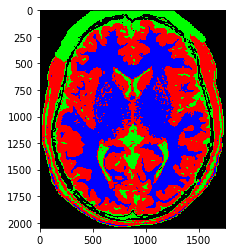

In [133]:
rgb_seg(MRI1,MRI1_seg, 0, 40, [0,0,0])
rgb_seg(MRI1,MRI1_seg, 40, 120, [0,255,0])
rgb_seg(MRI1,MRI1_seg, 120, 220, [255,0,0])
rgb_seg(MRI1,MRI1_seg, 220, 256, [0,0,255])
plt.imshow(MRI1_seg)

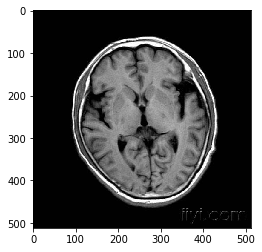

In [135]:
MRI2 = cv2.imread("MRI2.jpg",0)
plt.imshow(MRI2, cmap="gray")

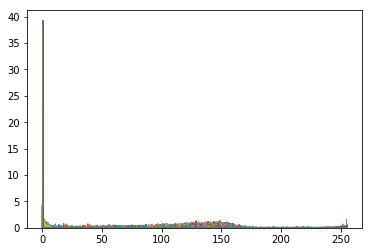

In [137]:
n, bins, _ = plt.hist(MRI2, density=True,bins=10000,histtype='step')

In [138]:
# segment MRI2 to 3 classes by GMM
np.random.seed(1)
g = mixture.GaussianMixture(n_components=3)
# Generate random observations with two modes centered on 0
# and 10 to use for training.
obs = MRI2.ravel()
obs = obs[:,np.newaxis]
g.fit(obs) 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [140]:
print(np.round(np.squeeze(g.means_), 2))
print(np.round(g.covariances_, 2))

[  1.    98.9  251.12]
[[[   0.  ]]

 [[2850.29]]

 [[  20.64]]]


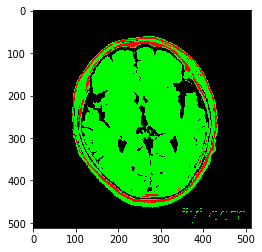

In [143]:
MRI2_seg = np.copy(MRI2)
MRI2_seg = MRI2_seg[:,:,np.newaxis]
MRI2_seg = np.repeat(MRI2_seg, 3, axis=2)
rgb_seg(MRI2,MRI2_seg, 0, 50, [0,0,0])
rgb_seg(MRI2,MRI2_seg, 50, 2000, [0,255,0])
rgb_seg(MRI2,MRI2_seg, 200, 256, [255,0,0])
plt.imshow(MRI2_seg)